In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [52]:
df=pd.read_csv("OnlineRetail.csv")
print(df.head())
print(df.describe())
print(df.info())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -8

In [53]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


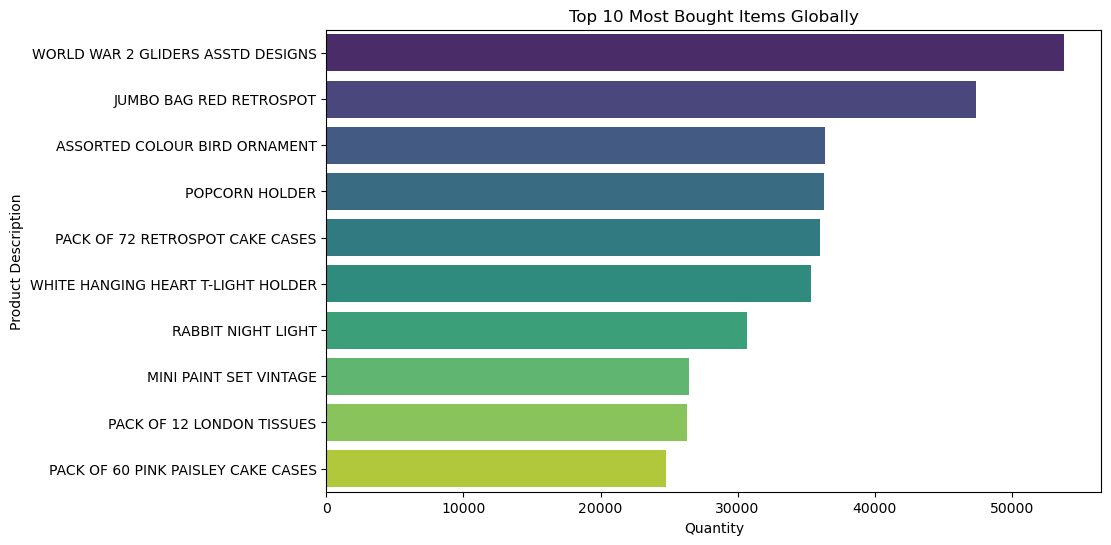

In [54]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df contains columns: Description, Quantity

# Group by Description and sum the quantities
global_items = df.groupby('Description')['Quantity'].sum().reset_index()

# Sorting to get top items
top_global_items = global_items.nlargest(10, 'Quantity')

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='Description', data=top_global_items, palette='viridis')
plt.title('Top 10 Most Bought Items Globally')
plt.xlabel('Quantity')
plt.ylabel('Product Description')
plt.show()

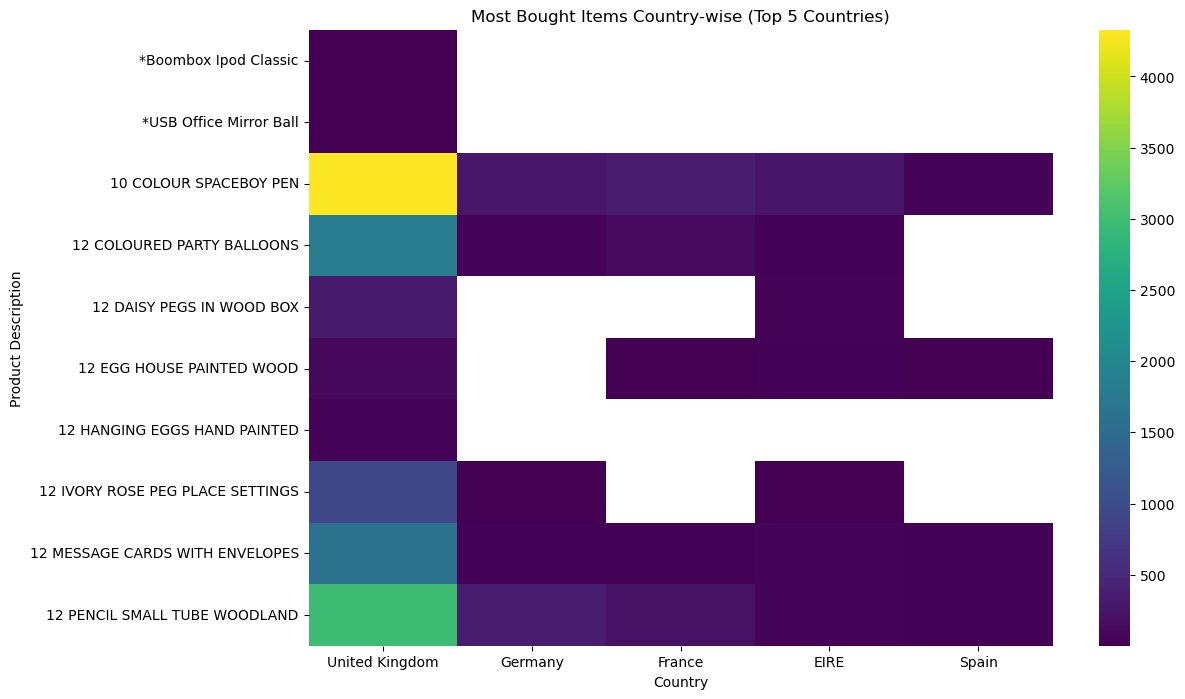

In [55]:
# Assuming df contains columns: Description, Country, Quantity, InvoiceDate

# Group by Description and Country, sum the quantities
country_items = df.groupby(['Description', 'Country'])['Quantity'].sum().reset_index()

# Pivot the table to have Description as rows, Country as columns, and Quantity as values
pivot_country_items = country_items.pivot(index='Description', columns='Country', values='Quantity')

# Get the top 5 countries with the most transactions
top_countries = df['Country'].value_counts().nlargest(5).index

# Filter the pivot table for top countries
pivot_country_items_top = pivot_country_items[top_countries]

# Plotting using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_country_items_top.head(10), cmap='viridis')
plt.title('Most Bought Items Country-wise (Top 5 Countries)')
plt.xlabel('Country')
plt.ylabel('Product Description')
plt.show()


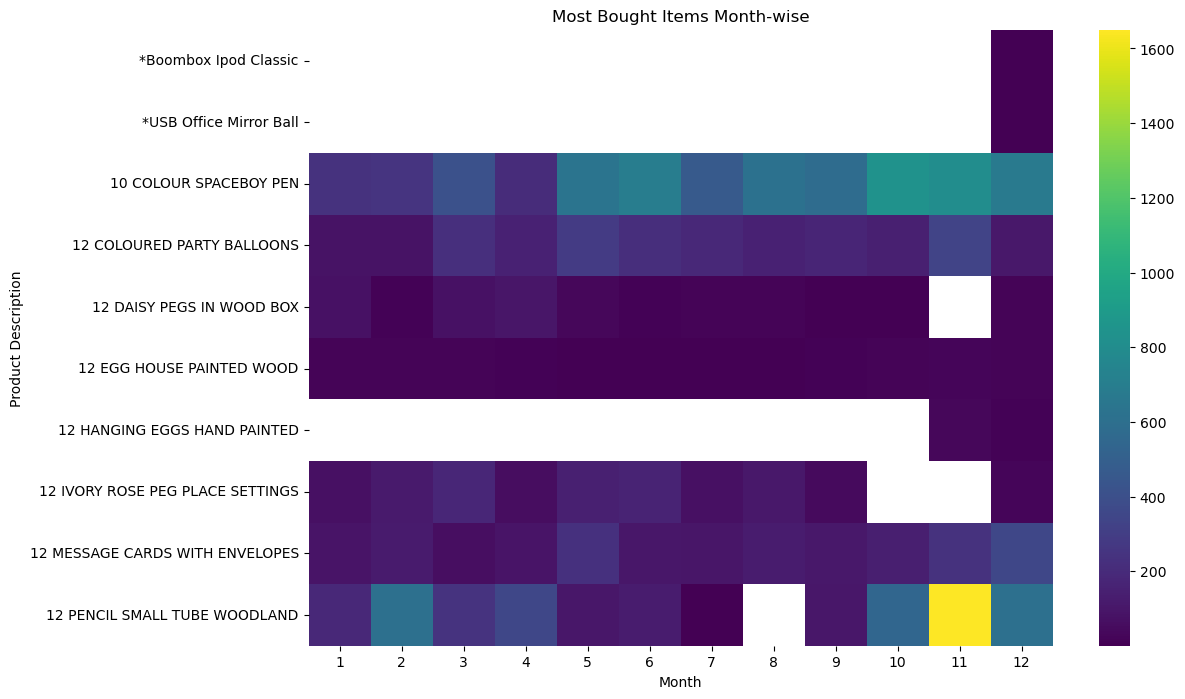

In [56]:
# Assuming df contains columns: Description, Quantity, InvoiceDate
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month from 'InvoiceDate'
df['Month'] = df['InvoiceDate'].dt.month

# Group by Description and Month, sum the quantities
month_items = df.groupby(['Description', 'Month'])['Quantity'].sum().reset_index()

# Pivot the table to have Description as rows, Month as columns, and Quantity as values
pivot_month_items = month_items.pivot(index='Description', columns='Month', values='Quantity')

# Plotting using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_month_items.head(10), cmap='viridis')
plt.title('Most Bought Items Month-wise')
plt.xlabel('Month')
plt.ylabel('Product Description')
plt.show()


In [57]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
import pandas as pd

def recommend_and_predict(file_path):
    # Load dataset from CSV
    data = pd.read_csv(file_path)

    # Data preprocessing
    data = data.dropna(subset=['CustomerID'])
    data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

    # Transformation for Surprise format
    reader = Reader(rating_scale=(0, 10))
    data_surprise = Dataset.load_from_df(data[['CustomerID', 'StockCode', 'Quantity']], reader)

    # Split dataset
    trainset, testset = train_test_split(data_surprise, test_size=0.25)

    # Initialize and train the model
    model = SVD()
    model.fit(trainset)

    # Get a specific user's recommendations
    user_id = 'specific_user_id'  # Replace with a valid customer ID from your dataset
    items_to_recommend = []  # List to hold recommended items
    for stock_code in data['StockCode'].unique():
        if not trainset.knows_user(user_id) or stock_code not in trainset.ur[trainset.to_inner_uid(user_id)]:
            items_to_recommend.append((stock_code, model.predict(user_id, stock_code).est))

    # Sort recommended items by predicted rating
    recommended = sorted(items_to_recommend, key=lambda x: x[1], reverse=True)[:10]  # Top 10 recommendations

    # Print top recommendations for the user
    print(f"Top 10 Recommendations for User {user_id}:")
    for item, rating in recommended:
        print(f"StockCode: {item}, Predicted Rating: {rating}")

    # Make predictions for test set (example)
    predictions = model.test(testset)
    for pred in predictions[:5]:  # Print predictions for the first 5 testset items
        print(f"User: {pred.uid}, Item: {pred.iid}, Predicted Rating: {pred.est}")

# Call the function with the file path to your dataset
file_path = 'OnlineRetail.csv'  # Replace with your file path
recommend_and_predict(file_path)

Top 10 Recommendations for User specific_user_id:
StockCode: 85123A, Predicted Rating: 10
StockCode: 71053, Predicted Rating: 10
StockCode: 84406B, Predicted Rating: 10
StockCode: 84029G, Predicted Rating: 10
StockCode: 84029E, Predicted Rating: 10
StockCode: 22752, Predicted Rating: 10
StockCode: 21730, Predicted Rating: 10
StockCode: 22633, Predicted Rating: 10
StockCode: 22632, Predicted Rating: 10
StockCode: 84879, Predicted Rating: 10
User: 14780.0, Item: 21259, Predicted Rating: 10
User: 12391.0, Item: 21126, Predicted Rating: 10
User: 17085.0, Item: 22444, Predicted Rating: 10
User: 14944.0, Item: 22470, Predicted Rating: 10
User: 16550.0, Item: 23256, Predicted Rating: 10
